In [1]:
import numpy as np # For operations on data
import pandas as pd # for converting the dataframe
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # For visualization
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

In [2]:
!nvidia-smi # To see the gpu assigned by Google Colab

Tue Feb  2 14:35:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive # to acess google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Health App/kidney_disease.csv') # convert cvs into pandas dataframe

In [5]:
df.shape # To visualize the shape

(400, 26)

In [6]:
df.head() # To see some of the data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.isnull().sum() # To watch the null values

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
df.info() # To see some information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
df.describe() # To see the data Statistically

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.classification.unique() # Seeing the unique values in classification

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
df['classification']=df.classification.where(df['classification'].values!='ckd\t','ckd',) # remove ckd\t with ckd

In [12]:
df.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [13]:
print("Null values in percent",(df.isnull().sum()/df.shape[0])*100,sep='\n') ## Seeing the null values by percentages

Null values in percent
id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


**Some Exploratory Data Analysis and Overview**

---

---





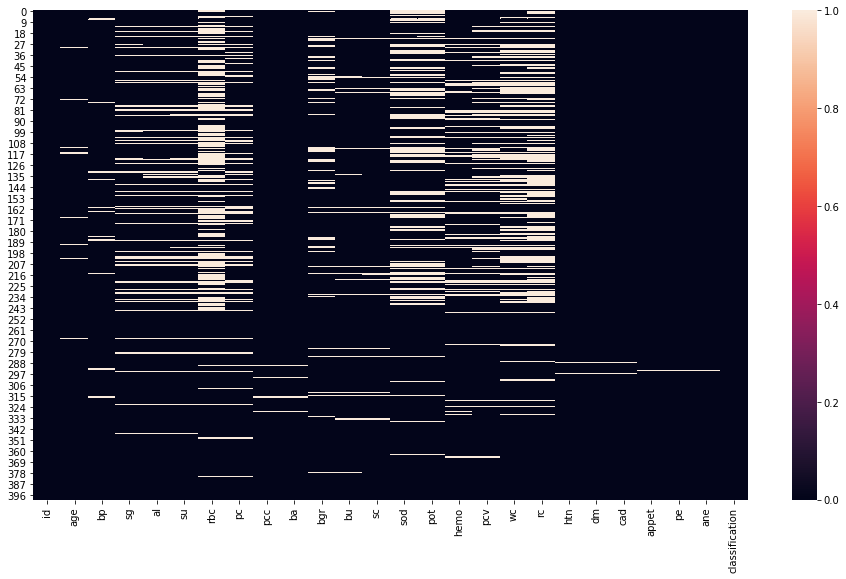

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull()) # Plotting the null values

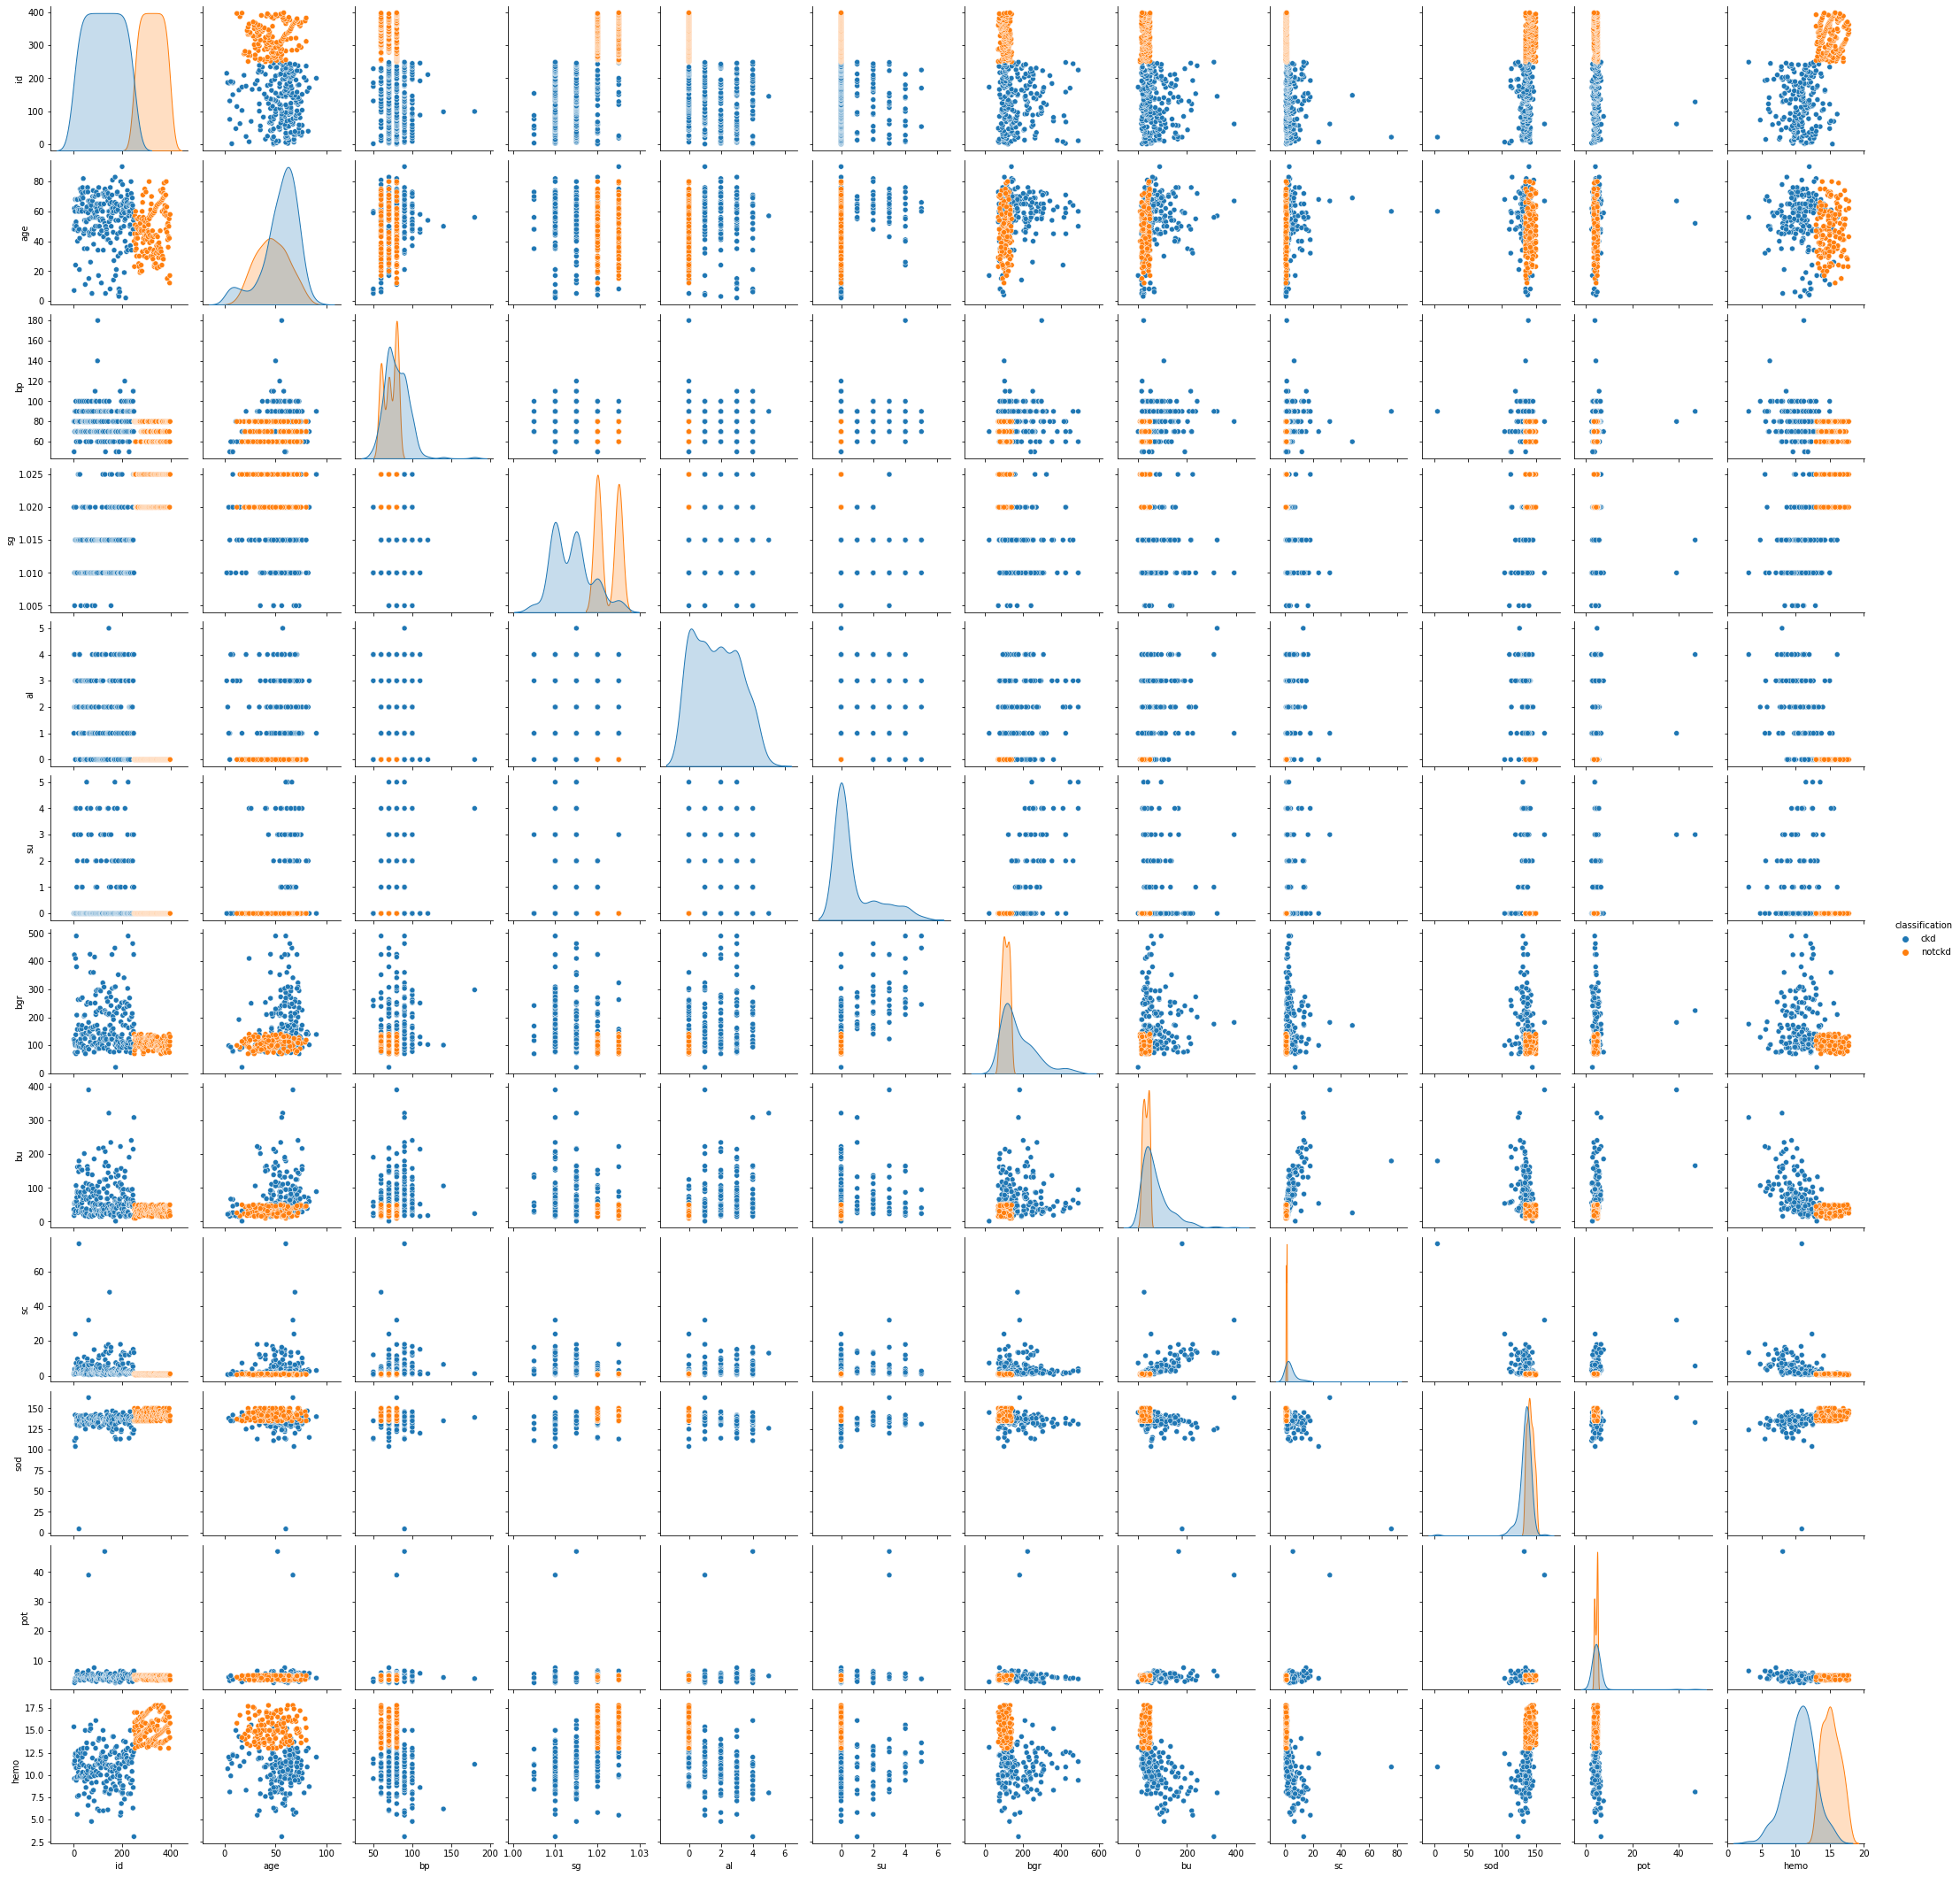

In [15]:
sns.pairplot(df,hue='classification') ## Pltting pairplot for statistical analysis

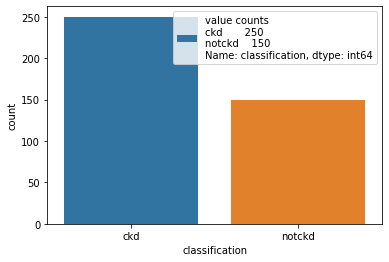

In [16]:

sns.countplot(df['classification']).legend([f"value counts\n{df.classification.value_counts()}"]) # Plotting  the counterplot for classification

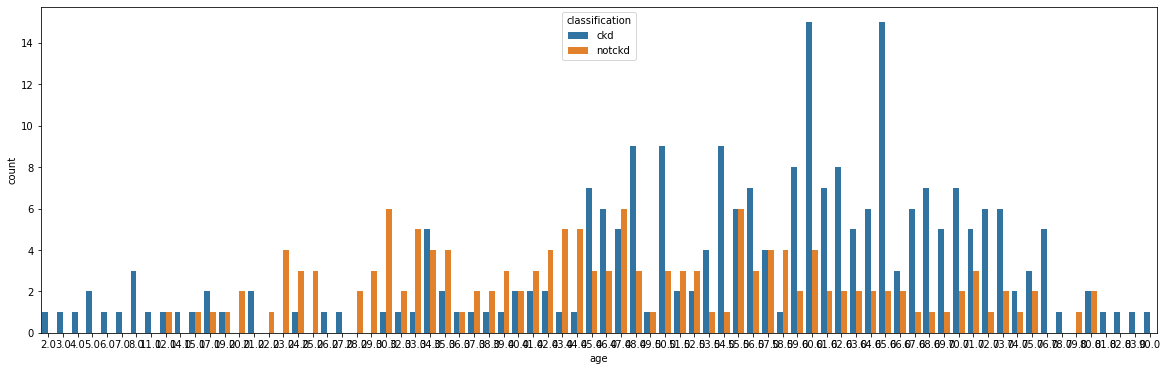

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(df['age'],hue=df['classification']) # Plotting the age with classification

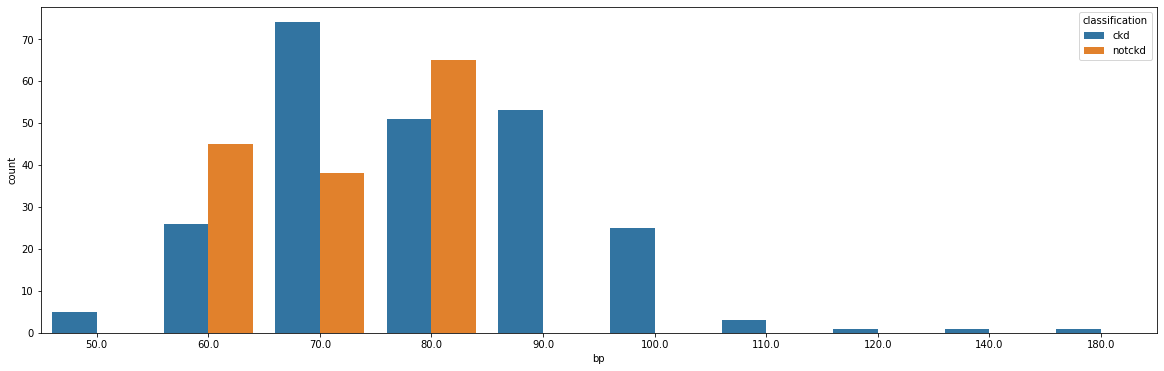

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(df['bp'],hue=df['classification']) # Plotting the blood pressure with classification

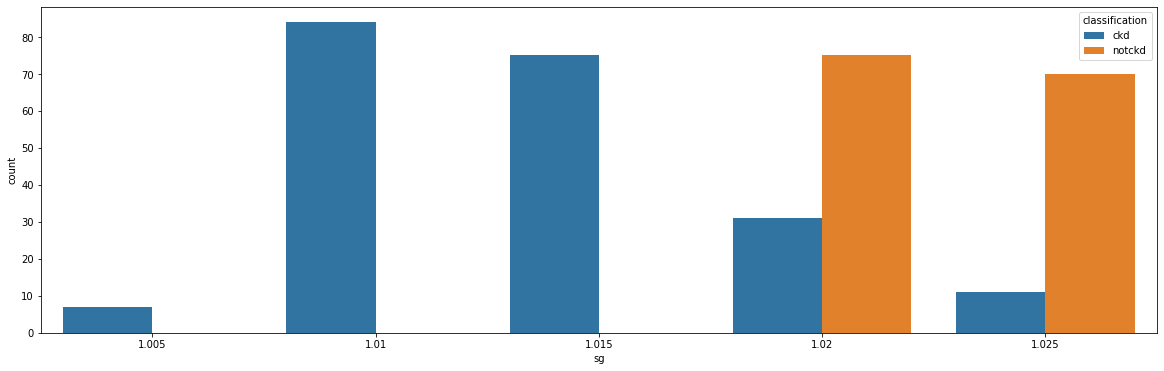

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(df['sg'],hue=df['classification']) # Plotting the sugure with classification

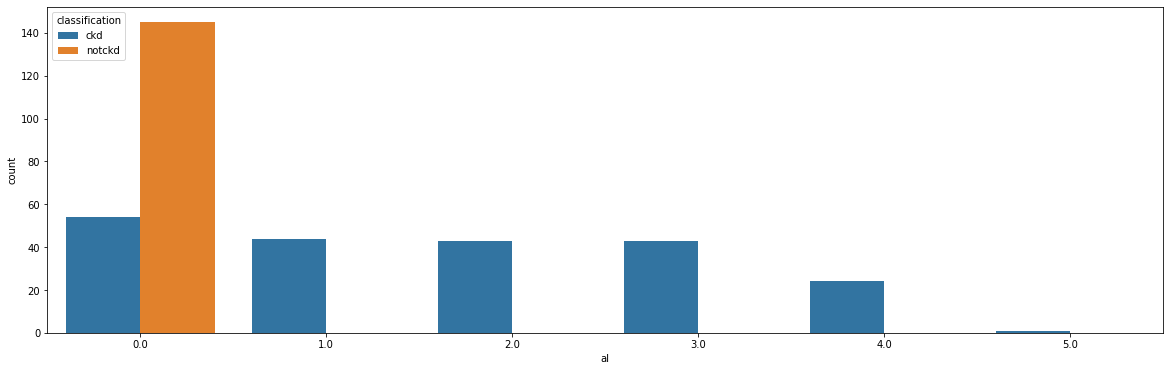

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(df['al'],hue=df['classification']) # Plotting the aluminium with classification

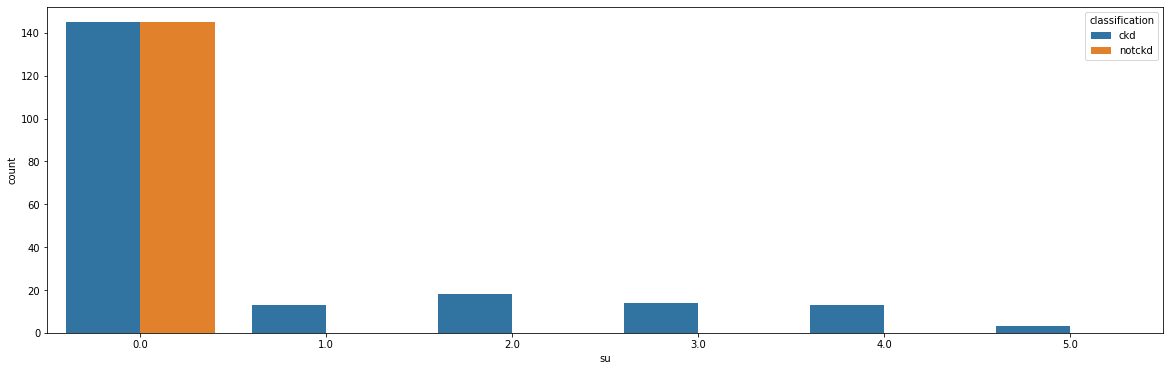

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(df['su'],hue=df['classification']) # Plotting the sudium with classification

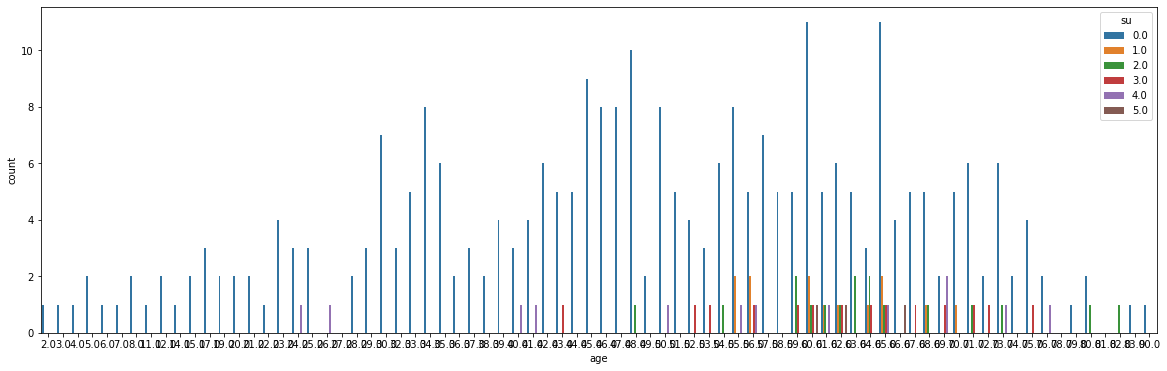

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(df['age'],hue=df['su']) # Plotting the sudium with sugar

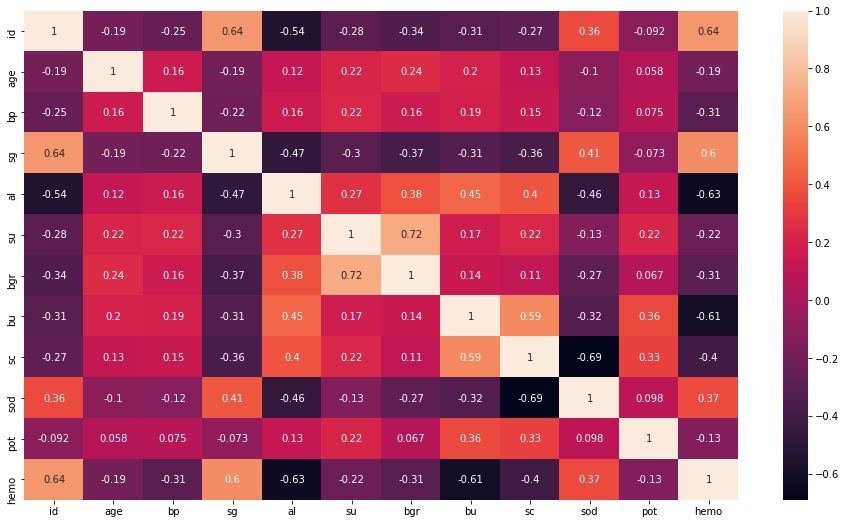

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True) # Plotting the correalation

# **Feature Engineering**

In [24]:
for col in df.select_dtypes("O").columns:
  print(f"Unique values for {col} are {df[col].unique()}\nValue Counts for {col} is {df[col].value_counts()}") # Try to extract some insights by uniue and value counts

Unique values for rbc are [nan 'normal' 'abnormal']
Value Counts for rbc is normal      201
abnormal     47
Name: rbc, dtype: int64
Unique values for pc are ['normal' 'abnormal' nan]
Value Counts for pc is normal      259
abnormal     76
Name: pc, dtype: int64
Unique values for pcc are ['notpresent' 'present' nan]
Value Counts for pcc is notpresent    354
present        42
Name: pcc, dtype: int64
Unique values for ba are ['notpresent' 'present' nan]
Value Counts for ba is notpresent    374
present        22
Name: ba, dtype: int64
Unique values for pcv are ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
Value Counts for pcv is 52      21
41      21
44      19
48      19
40      16
43      14
45      13
42      13
28      12
32      12
36      12
50      12
33      12
37      11
34      11
29       9
35     

In [25]:
df1=df.copy()
for col in df.select_dtypes("O").columns: 
  df1[col]=df1[col].map(lambda x: str(x).replace('\t',''))  # Remove \t from the data

In [26]:
for col in df1.select_dtypes("O").columns:
  print(f"Unique values for {col} are {df1[col].unique()}\nValue Counts for {col} is {df1[col].value_counts()}") # Try to extract some insights by uniue and value counts

Unique values for rbc are ['nan' 'normal' 'abnormal']
Value Counts for rbc is normal      201
nan         152
abnormal     47
Name: rbc, dtype: int64
Unique values for pc are ['normal' 'abnormal' 'nan']
Value Counts for pc is normal      259
abnormal     76
nan          65
Name: pc, dtype: int64
Unique values for pcc are ['notpresent' 'present' 'nan']
Value Counts for pcc is notpresent    354
present        42
nan             4
Name: pcc, dtype: int64
Unique values for ba are ['notpresent' 'present' 'nan']
Value Counts for ba is notpresent    374
present        22
nan             4
Name: ba, dtype: int64
Unique values for pcv are ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' 'nan' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
Value Counts for pcv is nan    70
41     21
52     21
44     19
48     19
40     16
43     15
42     13
45     13
36     12
50     12
28   

In [27]:
df1.shape # Verify the changes by its shape

(400, 26)

In [28]:
df2=df1.copy()
for col in df2.select_dtypes('O').columns: # removing nan and ?
  df2[col]=df2[col].mask(df2[col]=='?' ,np.nan)
  df2[col]=df2[col].mask(df2[col]=='nan' ,np.nan)

In [29]:
for col in df2.select_dtypes("O").columns:
  print(f"Unique values for {col} are {df2[col].unique()}\n\nValue Counts for {col} is {df2[col].value_counts()}") # Try to extract some insights by uniue and value counts

Unique values for rbc are [nan 'normal' 'abnormal']

Value Counts for rbc is normal      201
abnormal     47
Name: rbc, dtype: int64
Unique values for pc are ['normal' 'abnormal' nan]

Value Counts for pc is normal      259
abnormal     76
Name: pc, dtype: int64
Unique values for pcc are ['notpresent' 'present' nan]

Value Counts for pcc is notpresent    354
present        42
Name: pcc, dtype: int64
Unique values for ba are ['notpresent' 'present' nan]

Value Counts for ba is notpresent    374
present        22
Name: ba, dtype: int64
Unique values for pcv are ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']

Value Counts for pcv is 52    21
41    21
48    19
44    19
40    16
43    15
45    13
42    13
32    12
36    12
28    12
50    12
33    12
34    11
37    11
30     9
35     9
29     9
46     9
31     8
39     7
24 

In [30]:
df2.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [31]:
df2['pcv']=df2['pcv'].astype('float64') # Converting the data types
df2['wc']=df2['wc'].astype('float64')
df2['rc']=df2['rc'].astype('float64')


In [32]:
df2.dtypes # Verify the dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [33]:
X=df2.drop(['id','classification'],axis=1).copy() # Splitting the data into X and Y
y=df2['classification'].map({'ckd':1,'notckd':0}).copy()

In [34]:
print('Object datatypes mising in percent',(X.select_dtypes("O").isnull().sum()/X.shape[0])*100,sep='\n')

Object datatypes mising in percent
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
dtype: float64


In [35]:
for col in X.select_dtypes("O").columns[2:]: 
  X[col].fillna(value=X[col].mode()[0],axis=0,inplace=True)
for col in ['rbc','pc']:  # made dummy variables for X
  X=pd.get_dummies(X,dummy_na=True,columns=[col],drop_first=True)
for col in X.select_dtypes("O").columns: 
  X=pd.get_dummies(X,dummy_na=False,columns=[col],drop_first=True)

In [36]:
X.columns #verify by seeing the columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_normal', 'rbc_nan', 'pc_normal', 'pc_nan',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_no', 'dm_yes', 'cad_yes',
       'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

In [37]:
X.shape #verify by seeing the shape

(400, 27)

In [38]:
X.head() #verify by seeing the head

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,rbc_nan,pc_normal,pc_nan,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,0,1,1,0,0,0,1,0,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,1,1,0,0,0,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,1,0,1,0,0,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,0,1,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,1,0,1,0,0,0,0,1,0,0,0,0,0


In [39]:
from sklearn.impute import KNNImputer # For imputting missing val
imputer = KNNImputer(n_neighbors=2) # Imputing the nan values
X=imputer.fit_transform(X) 

In [40]:
X=pd.DataFrame(X,columns=['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_normal', 'rbc_nan', 'pc_normal', 'pc_nan',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_no', 'dm_yes', 'cad_yes',
       'appet_poor', 'pe_yes', 'ane_yes'])  # Convert X from numpy array to dataframe

In [41]:
X.head() # Seeing the head

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,rbc_nan,pc_normal,pc_nan,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,139.0,4.45,15.4,44.0,7800.0,5.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,101.5,18.0,0.8,138.0,3.80,11.3,38.0,6000.0,5.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,132.0,4.05,9.6,31.0,7500.0,3.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,137.0,4.30,11.6,35.0,7300.0,4.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.model_selection import train_test_split # importing train_test_split for spliting the model

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.33) # splitting the model into x_train,x_test,y_train,y_test

## **Training the model**

In [44]:
from sklearn import linear_model # Importing linear model for training the model

In [45]:
lr=linear_model.LogisticRegression() # initilize the logistic regression
lr.fit(x_train,y_train)  # fit x_train,y_train in this model
y_pred=lr.predict(x_test) # predicting the x_test
lr.score(x_test,y_test) # Seeing the accuracy by score

0.8939393939393939

In [46]:
from sklearn.metrics import classification_report,confusion_matrix # to see the classification accuray

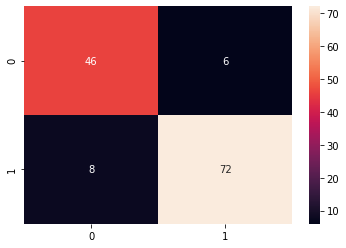

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') # ploting heatmap with confusion matrix 

In [48]:
from sklearn.ensemble import RandomForestClassifier # Importing RandomForestClassifier for training the model

In [49]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train) # fit x_train,y_train in this model
y_pred=rf.predict(x_test) # predicting the x_test
rf.score(x_test,y_test)

0.9621212121212122

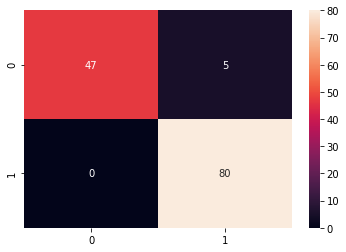

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [51]:
from sklearn.ensemble import AdaBoostClassifier # Importing AdaBoostClassifier for training the model

In [52]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train) # fit x_train,y_train in this model
y_pred=ab.predict(x_test) # predicting the x_test
ab.score(x_test,y_test)

0.9696969696969697

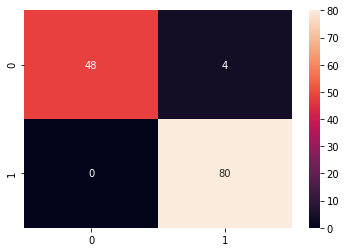

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [54]:
from sklearn.svm import SVC # Importing SVC for training the model

In [55]:
sv=SVC()
sv.fit(x_train,y_train) # fit x_train,y_train in this model
y_pred=sv.predict(x_test) # predicting the x_test
sv.score(x_test,y_test)

0.6060606060606061

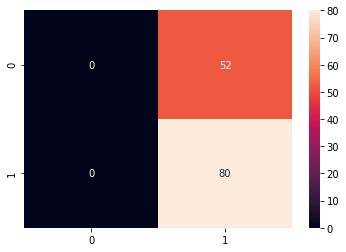

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') 

In [57]:
from sklearn.ensemble import GradientBoostingClassifier # Importing GradientBoostingClassifier for training the model

In [58]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train) # fit x_train,y_train in this model
y_pred=gb.predict(x_test) # predicting the x_test
gb.score(x_test,y_test)

0.946969696969697

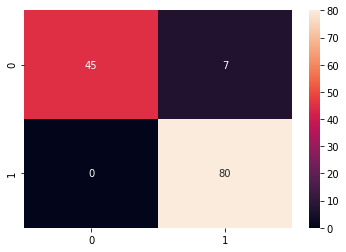

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [60]:
import xgboost # Importing xgboost for training the model

In [61]:
xgb=xgboost.XGBClassifier()
xgb.fit(x_train,y_train) # fit x_train,y_train in this model
y_pred=xgb.predict(x_test) # predicting the x_test
xgb.score(x_test,y_test) 

0.9621212121212122

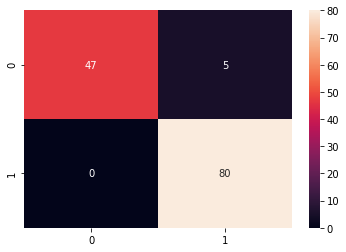

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [63]:
from sklearn.feature_selection import SelectFromModel # Importing SelectFromModel to select the featurees from lasso model

In [64]:
feature_sel=SelectFromModel(linear_model.Lasso(0.005))
feature_sel.fit(x_train,y_train) # fit x_train,y_train in this model

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [65]:
feature_sel.get_support() # Get the boolean value to find which features are selecting by the lasso

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False,  True])

In [66]:
x_train.columns[feature_sel.get_support()] # The columns selecting by the lasso

Index(['age', 'bp', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
       'rc', 'rbc_normal', 'rbc_nan', 'pc_normal', 'htn_yes', 'dm_yes',
       'cad_yes', 'ane_yes'],
      dtype='object')

In [67]:
xgb=xgboost.XGBClassifier() # Again seeing the accuracy by putting these features into XGBClassifier
xgb.fit(x_train[x_train.columns[feature_sel.get_support()]],y_train) # fit x_train,y_train in this model
y_pred=xgb.predict(x_train[x_train.columns[feature_sel.get_support()]]) # predicting the x_test
xgb.score(x_test[x_test.columns[feature_sel.get_support()]],y_test)

0.946969696969697

In [68]:
ab1=AdaBoostClassifier() # Again seeing the accuracy by putting these features into AdaBoostClassifier
ab1.fit(x_train[x_train.columns[feature_sel.get_support()]],y_train) # fit x_train,y_train in this model
y_pred=ab1.predict(x_train[x_train.columns[feature_sel.get_support()]])
ab1.score(x_test[x_test.columns[feature_sel.get_support()]],y_test) # So Adaboost classifier work best even with less features so we use this model for the predictions

0.9621212121212122

In [69]:
import pickle # To save the model

In [70]:
model_path='/content/drive/MyDrive/Health App/Model/kidney_disease_ab1_model.sav' #Path specifying for saving this model
pickle.dump(ab1,open(model_path,'wb')) #Finally dump our model